In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import keras

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
from callbacks import *

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
model = Sequential()
model.add(Dense(25, input_dim=4, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))

import sklearn.datasets as datasets
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, oneHot(y_train), epochs=500, batch_size=30, verbose=0)

accuracy_score(y_test, model.predict(X_test).argmax(1))

0.98333333333333328

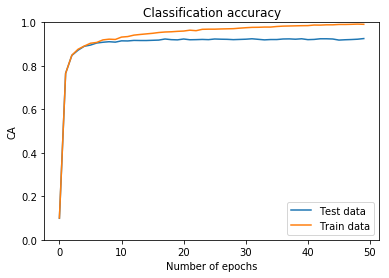

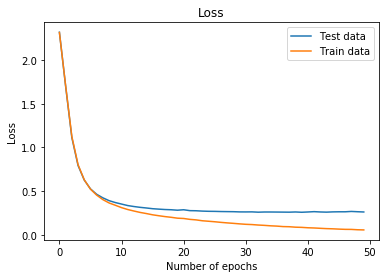

In [4]:
from keras.regularizers import l2
model = Sequential()
model.add(Dense(25, input_dim=400, activation='sigmoid'))# , kernel_regularizer = l2(0.01)))
model.add(Dense(10, activation='sigmoid'))



from scipy.io import loadmat
data = loadmat('ex3data1.mat')
X, y = data['X'], data['y']
y = y.reshape(X.shape[0], )
y = y - 1
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ca_callback = CACallback(X_test, oneHot(y_test), X_train, oneHot(y_train))
loss_callback = LossCallback(X_test, oneHot(y_test), X_train, oneHot(y_train))
itr_callback = IterationCallback(5)

model.fit(X_train, oneHot(y_train), epochs=50, batch_size=10, verbose=0, callbacks=[ca_callback, loss_callback])

ca_callback.plot()
loss_callback.plot()

1 Layer Neural Network

In [11]:
from keras.regularizers import l2
model = Sequential()
model.add(Dense(10, input_dim=400, activation='sigmoid'))



from scipy.io import loadmat
data = loadmat('ex3data1.mat')
X, y = data['X'], data['y']
y = y.reshape(X.shape[0], )
y = y - 1
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ca_callback = CACallback(X_test, oneHot(y_test), X_train, oneHot(y_train))
loss_callback = LossCallback(X_test, oneHot(y_test), X_train, oneHot(y_train))
itr_callback = IterationCallback(5)

model.fit(X_train, oneHot(y_train), epochs=150, batch_size=10, verbose=0, callbacks=[ca_callback, loss_callback])

#ca_callback.plot()
#loss_callback.plot()
_, random_ca = ca_callback.get_data()

In [12]:
from keras.regularizers import l2
from nmf import NMF
from aa import AA
model = Sequential()



a = AA(X_train, 10)
a.factorize(200)
print("done")
w1 = a.H.T/400
print(np.max(w1), w1.shape)
b1 = np.random.rand(10)


layer = Dense(10, input_dim=400, activation='sigmoid', weights = [w1, b1])
model.add(layer)

from scipy.io import loadmat
data = loadmat('ex3data1.mat')
X, y = data['X'], data['y']
y = y.reshape(X.shape[0], )
y = y - 1
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


ca_callback = CACallback(X_test, oneHot(y_test), X_train, oneHot(y_train))
loss_callback = LossCallback(X_test, oneHot(y_test), X_train, oneHot(y_train))
itr_callback = IterationCallback(5)

model.fit(X_train, oneHot(y_train), epochs=150, batch_size=10, verbose=0, callbacks=[ca_callback, loss_callback])

#ca_callback.plot()
#loss_callback.plot()
_, matrix_ca = ca_callback.get_data()

done
0.00250000017873 (400, 10)


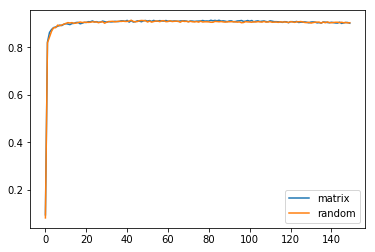

In [13]:
plt.plot(matrix_ca, label = "matrix")
plt.plot(random_ca, label = "random")
plt.legend(loc='lower right')
plt.show()

In [8]:
#from tensorflow.examples.tutorials.mnist import input_data
#from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
#from keras.models import Model
#from keras.optimizers import Adam
#from keras.regularizers import l1
#
#import numpy as np
#import matplotlib.pyplot as plt
#import keras.backend as K
#import tensorflow as tf
#
#
#mnist = input_data.read_data_sets('../data/MNIST_data', one_hot=True)
#X, _ = mnist.train.images, mnist.train.labels
#
#inputs = Input(shape=(784,))
#h = Dense(200, activation='sigmoid')(inputs)
#outputs = Dense(784)(h)
#
#model = Model(input=inputs, output=outputs)
#model.compile(optimizer='adam', loss='mse')
#model.fit(X, X, batch_size=10, epochs=5)

In [9]:
from nmf import NMF

r = np.random.rand(8,4)

f = NMF(r, 3)
f.factorize(20)
print(f.W)
print(f.H)

[[ 0.60668073  0.59293175  0.10002185]
 [ 0.19001156  0.64149742  0.18872148]
 [ 0.0050229   0.45206365  0.2466402 ]
 [ 0.04122269  0.19307027  0.67296629]
 [ 0.04616092  0.44963408  0.06489389]
 [ 0.41438992  0.15395835  0.52948119]
 [ 0.63868089  0.0654623   0.28563949]
 [ 0.20730959  0.27006349  0.00095284]]
[[  7.07022283e-01   2.34860438e-01   1.32790475e+00   1.69001603e-01]
 [  5.25272715e-01   1.08266744e+00   2.67192704e-01   1.08673709e+00]
 [  8.82720160e-01   1.02561282e+00   3.64230395e-01   9.30524715e-04]]


In [10]:
#%matplotlib inline
#import matplotlib
#import matplotlib.pyplot as plt
#
#from keras.layers import Input, Dense
#from keras.models import Model
#
#encoding_dim = 10  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
#
#
#input_img = Input(shape=(784,))
#encoded = Dense(encoding_dim, activation='relu')(input_img)
#decoded = Dense(784, activation='sigmoid')(encoded)
#
#autoencoder = Model(input=input_img, output=decoded)
#encoder = Model(input=input_img, output=encoded)
#
## create a placeholder for an encoded (32-dimensional) input
#encoded_input = Input(shape=(encoding_dim,))
## retrieve the last layer of the autoencoder model
#decoder_layer = autoencoder.layers[-1]
## create the decoder model
#decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
#
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#
#from keras.datasets import mnist
#import numpy as np
#(x_train, _), (x_test, _) = mnist.load_data()
#
#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#
#
#autoencoder.fit(x_train, x_train,
#                epochs=5,
#                batch_size=100,
#                shuffle=True,
#                validation_data=(x_test, x_test))
#
#encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)
#
#n = 12  # how many digits we will display
#plt.figure(figsize=(20, 4))
#for i in range(10):
#    # display original
#    ax = plt.subplot(2, n, i + 1)
#    plt.imshow(x_test[i].reshape(28, 28))
#    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)
#
#    # display reconstruction
#    ax = plt.subplot(2, n, i + 1 + n)
#    plt.imshow(decoded_imgs[i].reshape(28, 28))
#    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)
#plt.show()